## Importing Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore');

## Loading The Dataset

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/toronto-emotional-speech-set-tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        labels.append(filename.split("_")[-1].split(".")[0])   #fetches the type of emotion from the file name and appends it to the labels list
print("Dataset is loaded")

Dataset is loaded


In [3]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [4]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [5]:
df = pd.DataFrame()
df['path'] = paths
df['emotions'] = labels
df.head()

,path,emotions
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [6]:
df['emotions'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: emotions, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='emotions', ylabel='count'>

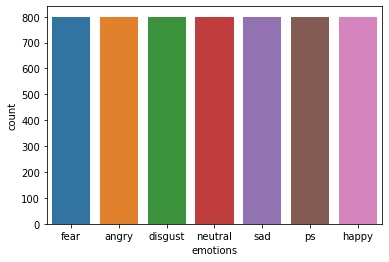

In [7]:
sns.countplot(df['emotions']) #all emotion classes are of equal distribution, no need of class balancing

In [8]:
#function for displaying waveplot of the emotion
def waveplot(data, sr, emotion):        #sr = sample rate
    plt.figure(figsize = (10,4))
    plt.title("Waveplot of " + emotion)
    librosa.display.waveshow(data, sr = sr)
    plt.ylabel("Amplitude")
    plt.show()
    
#function for displaying spectrogram of the emotion
def spectrogram(data, sr, emotion):
    #plt.specgram(data)
    x = librosa.stft(data)        #using Discrete Fourier Transform to transform Amplitude to frequency
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (12,4))
    librosa.display.specshow(xdb, sr = sr, x_axis = "time", y_axis = "hz")
    plt.title("spectrogram of " + emotion)
    plt.colorbar()
    #plt.show()

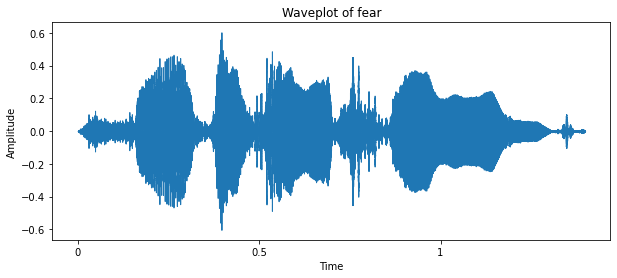

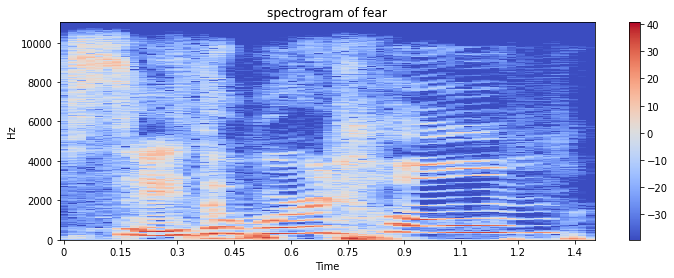

In [9]:
emotion = "fear"
path = np.array(df["path"][df["emotions"] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

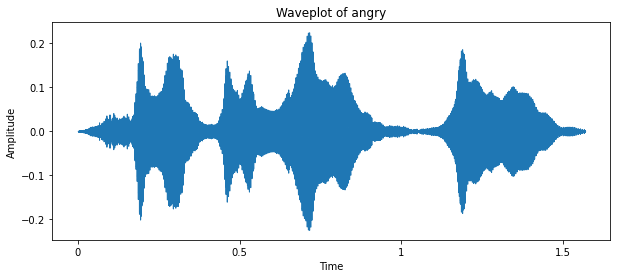

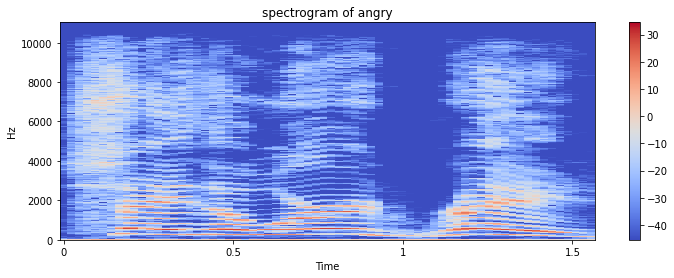

In [10]:
emotion = "angry"
path = np.array(df["path"][df["emotions"] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

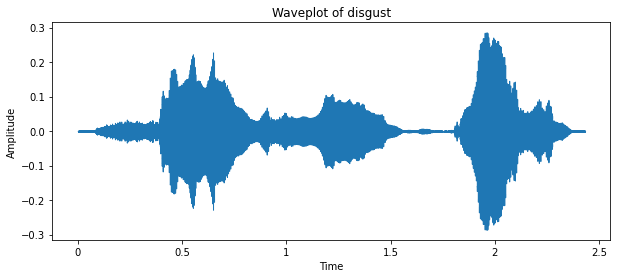

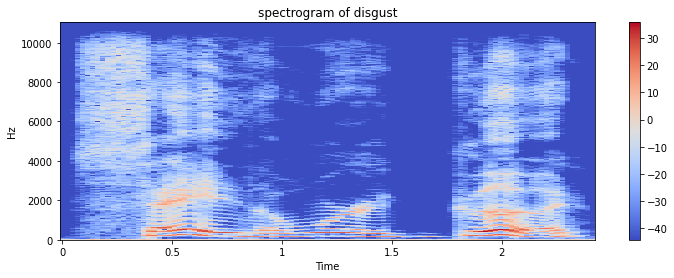

In [11]:
emotion = "disgust"
path = np.array(df["path"][df["emotions"] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

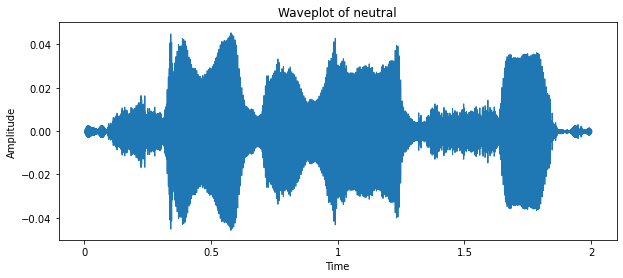

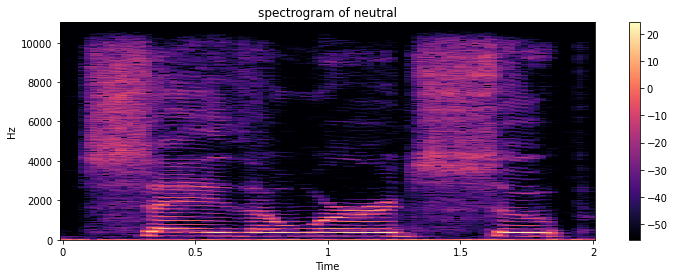

In [12]:
emotion = "neutral"
path = np.array(df["path"][df["emotions"] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

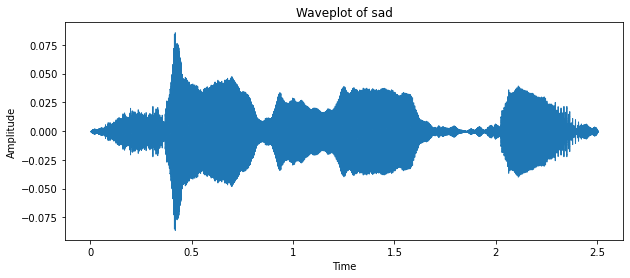

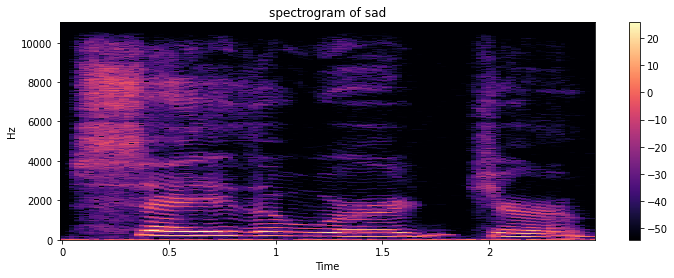

In [13]:
emotion = "sad"
path = np.array(df["path"][df["emotions"] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

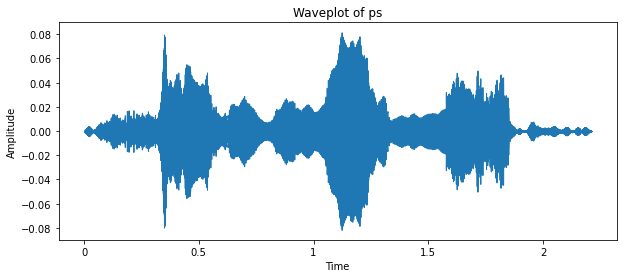

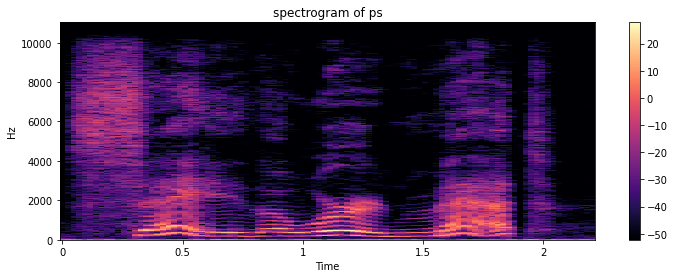

In [14]:
emotion = "ps"
path = np.array(df["path"][df["emotions"] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

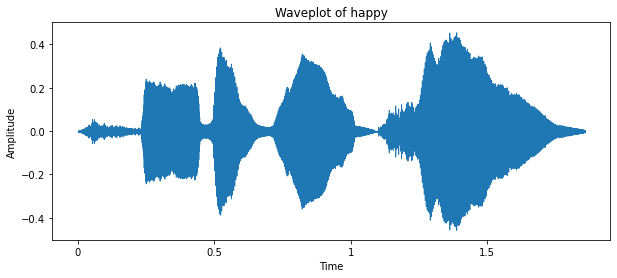

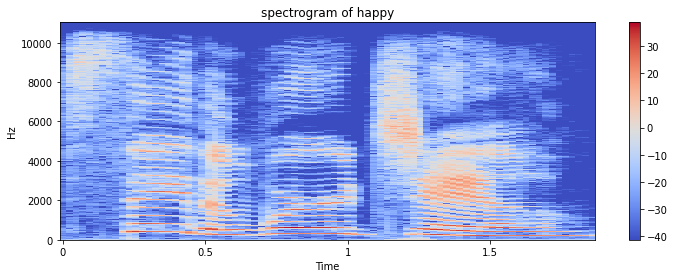

In [15]:
emotion = "happy"
path = np.array(df["path"][df["emotions"] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [16]:
#function for feature extraction using mfcc
#mfcc is used for feature extraction because it is a representation of the short-term power spectrum of a sound, based on some transformation in a Mel-scale
#In Mel-Scale equal distances in pitch sounded equally distant to the listener. Commonly used in SER as people’s voices are usually on a certain range of frequency and different from one to another.

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y, sr = sr, n_mfcc = 40), axis = 1)     #axis = 1 is mean along the rows
    #print(np.shape(mfcc))
    return mfcc

In [17]:
#extracting features from one speech data file
extract_mfcc(df['path'][0])

array([-287.13037   ,   87.756935  ,   -4.139177  ,   24.081968  ,
        -16.696724  ,   12.970632  ,   10.522444  ,   -1.1463214 ,
         -0.73337686,   12.855532  ,  -19.147291  ,   -6.418063  ,
          4.9657683 ,   -2.6571155 ,  -10.655444  ,    4.9578815 ,
        -14.55586   ,   15.37587   ,   18.444935  ,   23.878317  ,
         31.495146  ,   17.326372  ,   -4.7648373 ,    1.7432437 ,
        -12.009847  ,    7.34574   ,   -3.2051265 ,   -7.171453  ,
        -11.410634  ,   -2.001994  ,   -5.610964  ,    4.5321946 ,
        -11.396625  ,   -8.892363  ,   -3.7391376 ,    4.8819685 ,
         -1.5599903 ,    2.465447  ,   11.59915   ,   11.042192  ],
      dtype=float32)

In [18]:
#extrating all the data and storing it in a variable
X_mfcc = df['path'].apply(lambda x: extract_mfcc(x))

In [19]:
X_mfcc

0       [-287.13037, 87.756935, -4.139177, 24.081968, ...
1       [-350.0836, 37.654167, -6.2928553, 17.09615, 4...
2       [-341.78152, 56.153652, -16.617884, 23.219698,...
3       [-309.17456, 24.854897, -8.00109, 10.065497, -...
4       [-347.12918, 49.69155, -27.524876, 22.730288, ...
                              ...                        
5595    [-376.5839, 63.9598, -3.0598662, 11.498796, -2...
5596    [-316.5801, 43.54606, -9.336959, -0.198444, -5...
5597    [-359.7638, 81.01536, -18.355762, 5.3012295, -...
5598    [-354.38315, 103.432144, -15.916284, -10.30884...
5599    [-391.15958, 56.44471, -1.0464002, 0.9587419, ...
Name: path, Length: 5600, dtype: object

In [20]:
#converting the abover features to a 2d array
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [21]:
# input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['emotions']])  #passing as 2d array

In [23]:
#type(y)
y = y.toarray()
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
y.shape

(5600, 7)

### Shuffling X and y

In [30]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Creating the LSTM Model

In [31]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential([
    LSTM(128, return_sequences = False, input_shape = (40,1)),
    Dense(64,activation = 'relu'),
    Dropout(0.2),
    Dense(32,activation = 'relu'),
    Dropout(0.2),
    Dense(7,activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

2022-11-29 04:45:39.918934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 04:45:39.919910: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 04:45:40.098805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 04:45:40.099754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 04:45:40.100614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 77,127
Trainable params: 77,127
Non-trainable params: 0
____________________________________________________

### Training the model

In [32]:
#using history to track the model and suffling as there is no dependency between the samples
history = model.fit(X, y, validation_split = 0.2, epochs = 100, batch_size = 512, shuffle = True)

2022-11-29 04:46:10.068826: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-29 04:46:13.154771: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


9/9 [==============================] - 6s 67ms/step - loss: 1.8221 - accuracy: 0.2625 - val_loss: 1.6451 - val_accuracy: 0.3045
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 1.5388 - accuracy: 0.4100 - val_loss: 1.2476 - val_accuracy: 0.5527
Epoch 3/100
9/9 [==============================] - 0s 15ms/step - loss: 1.1822 - accuracy: 0.5404 - val_loss: 0.8983 - val_accuracy: 0.6643
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.9351 - accuracy: 0.6250 - val_loss: 0.6957 - val_accuracy: 0.7812
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 0.7919 - accuracy: 0.6828 - val_loss: 0.5487 - val_accuracy: 0.8205
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6250 - accuracy: 0.7699 - val_loss: 0.3740 - val_accuracy: 0.9045
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 0.4828 - accuracy: 0.8308 - val_loss: 0.2595 - val_accuracy: 0.9259
Epoch 8/100
9/9 [===============

### Saving the model

In [33]:
#os.path.isfile('/kaggle/working/SER_trained.h5') is false:
model.save('/kaggle/working/SER_trained.h5')

### Loading the model

In [34]:
from tensorflow.keras.models import load_model
new_model = load_model('/kaggle/working/SER_trained.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 77,127
Trainable params: 77,127
Non-trainable params: 0
____________________________________________________

## Plotting the Results

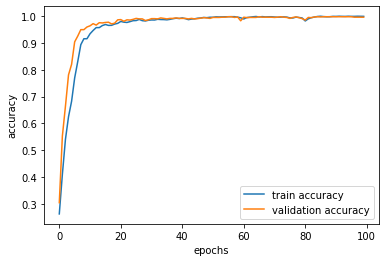

In [35]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

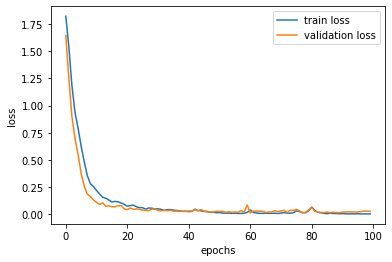

In [36]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### Testing

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

In [109]:
classified_emotions = enc.categories_
classified_emotions = np.array(classified_emotions).ravel()
classified_emotions                        #displaying all the emotions classified by the model

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
      dtype=object)

In [110]:
def show_test_results(predictions,classified_emotions):
    index = 0
    res = []
    for prediction in predictions:
        index = 0
        for i in prediction:
            if(i):
                break
            index = index + 1
        res.append(classified_emotions[index])
    return res

In [111]:
def convert_softmax_to_bool(predictions):
    predictions = [x > 0.9 for x in predictions]
    return predictions
def ohe_to_bool(y):
    y = [x == 1. for x in y]
    return y

In [115]:
# Predicting test results
preds = new_model.predict(x = X_test, batch_size = 512)
conv_preds = convert_softmax_to_bool(preds)
result = show_test_results(conv_preds, classified_emotions)
print(result[:10])
y_t = ohe_to_bool(y_test)
y_t = show_test_results(y_test, classified_emotions)
print(y_t[:10])
print(y_test[:3])
print(preds[:3])

['angry', 'disgust', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'angry', 'fear']
['angry', 'disgust', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'angry', 'fear']
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
[[9.9999952e-01 1.4057187e-08 3.3259400e-07 5.1442505e-08 1.1079994e-07
  3.6569457e-08 2.1500821e-08]
 [9.1852847e-08 9.9999928e-01 1.9205593e-10 4.8520139e-09 1.8646407e-09
  4.2233614e-07 1.4466974e-07]
 [9.9999964e-01 1.6736675e-09 2.2769629e-07 3.4347213e-08 8.4573619e-09
  1.0090278e-07 8.7862918e-11]]


### Plotting confusion matrix

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_t, result))
print("Accuracy Score")
print(accuracy_score(y_t, result))

Confusion Matrix
[[161   0   0   0   0   0   0]
 [  0 156   0   0   0   0   0]
 [  0   0 164   0   0   0   0]
 [  0   0   0 179   0   0   0]
 [  0   0   0   0 159   0   0]
 [  0   0   0   2   0 153   0]
 [  0   0   0   0   0   0 146]]
Accuracy Score
0.9982142857142857


## Importing a new dataset to test the model

In [128]:
rav_path = []
for dirname, _, filenames in os.walk('/kaggle/input/ravdess-emotional-speech-audio'):
    for filename in filenames:
        if(len(rav_path) < 10):
            rav_path.append(os.path.join(dirname, filename))
        else:
            break
print(rav_path)

['/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav', '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav']


In [129]:
rav_df = pd.DataFrame()
rav_df['test_path'] = rav_path
rav_df

,test_path
0,/kaggle/input/ravdess-emotional-speech-audio/A...
1,/kaggle/input/ravdess-emotional-speech-audio/A...
2,/kaggle/input/ravdess-emotional-speech-audio/A...
3,/kaggle/input/ravdess-emotional-speech-audio/A...
4,/kaggle/input/ravdess-emotional-speech-audio/A...
5,/kaggle/input/ravdess-emotional-speech-audio/A...
6,/kaggle/input/ravdess-emotional-speech-audio/A...
7,/kaggle/input/ravdess-emotional-speech-audio/A...
8,/kaggle/input/ravdess-emotional-speech-audio/A...
9,/kaggle/input/ravdess-emotional-speech-audio/A...


In [130]:
extract_mfcc(rav_df['test_path'][0])

array([-5.4180322e+02,  4.6443954e+01, -1.9874784e+01,  1.3498629e+01,
       -1.0884649e+01, -6.6056757e+00, -5.9699273e+00, -4.7564931e+00,
       -5.8078127e+00, -2.1547236e+00, -6.8775582e+00, -3.5889626e+00,
       -5.9721661e+00,  3.7502513e+00, -4.1736312e+00,  4.4313712e+00,
       -2.5863929e+00,  1.3225590e+00, -2.6785922e+00,  4.3298616e+00,
       -9.6483874e-01,  3.9990318e-01, -3.5858688e+00,  1.3376228e+00,
       -7.5527465e-01,  2.5591412e+00,  3.2790608e+00,  4.6649895e+00,
        3.6523273e+00,  7.0504742e+00,  3.2739725e+00,  5.5478759e+00,
       -2.8256577e-01,  3.4916277e+00,  1.7033703e+00,  5.3403544e+00,
        2.2099304e-01,  2.9855683e+00,  9.7632605e-01,  2.0997212e+00],
      dtype=float32)

In [131]:
X_test = rav_df['test_path'].apply(lambda x: extract_mfcc(x))

In [132]:
X_test

0    [-541.8032, 46.443954, -19.874784, 13.498629, ...
1    [-616.19037, 65.96525, -13.771617, 11.089394, ...
2    [-504.0144, 64.27952, -20.179428, 9.185249, -1...
3    [-605.88776, 69.01345, -18.07557, 12.204582, -...
4    [-576.95807, 64.35269, -15.88516, 6.5235624, -...
5    [-460.50284, 20.720871, -34.343407, -3.4934168...
6    [-623.7976, 54.78518, -7.3854475, 6.5977883, -...
7    [-615.6513, 60.23223, -14.779554, 14.921408, -...
8    [-602.34204, 64.67018, -14.150109, 12.723682, ...
9    [-553.4808, 53.023388, -26.88164, 11.609894, -...
Name: test_path, dtype: object

In [133]:
Xt = [x for x in X_test]
Xt = np.array(Xt)
Xt.shape

(10, 40)

In [134]:
Xt = np.expand_dims(Xt, -1)
Xt.shape

(10, 40, 1)

In [137]:
Audio(rav_df['test_path'][5])

In [143]:
predictions = new_model.predict(x = Xt, batch_size = 512)

In [144]:
for prediction in predictions:
    print(prediction)

[4.4702931e-05 9.9967384e-01 4.8843020e-07 3.8659591e-06 2.7701715e-06
 2.5661787e-04 1.7629764e-05]
[4.9267436e-07 9.9999726e-01 2.7516840e-09 4.6584098e-08 1.5359140e-08
 1.4546862e-06 8.4757107e-07]
[7.6082921e-07 9.9999499e-01 6.8123778e-09 9.5802264e-08 3.3536431e-08
 1.8948301e-06 2.3013231e-06]
[9.1963969e-08 9.9999905e-01 3.4336151e-10 7.7917139e-09 3.8645123e-09
 2.8780360e-07 5.3541754e-07]
[3.8327079e-07 9.9999774e-01 2.0766453e-09 3.8174978e-08 1.1537133e-08
 1.1546159e-06 7.5597166e-07]
[0.0040074  0.9248547  0.01599785 0.02720633 0.00119288 0.00545506
 0.02128581]
[9.8106557e-01 2.5861981e-04 5.3234107e-05 4.3432625e-05 7.5313059e-05
 1.8499894e-02 3.9297861e-06]
[2.9972486e-07 9.9999821e-01 1.1586220e-09 1.8955284e-08 9.4132311e-09
 9.1484924e-07 4.9335233e-07]
[3.6418967e-08 9.9999964e-01 7.4330299e-11 1.8835145e-09 1.0191116e-09
 1.2847052e-07 1.8475897e-07]
[2.9332165e-07 9.9999809e-01 1.5846847e-09 2.9736441e-08 9.4812522e-09
 8.7449331e-07 7.3296189e-07]


In [145]:
conv_predictions = convert_softmax_to_bool(predictions)
res = show_test_results(conv_predictions, classified_emotions)
res

['disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'disgust',
 'angry',
 'disgust',
 'disgust',
 'disgust']

# Function to Prediction emotion

In [165]:
def predict_emotion(path):
    X = extract_mfcc(path)
    X = np.transpose(np.expand_dims(X, -1))
    X = np.expand_dims(X, -1)
    prediction = new_model.predict(x = X, batch_size = 512)
    conv_predictions = convert_softmax_to_bool(prediction)
    res = show_test_results(conv_predictions, classified_emotions)
    print(res)

In [166]:
predict_emotion(rav_df['test_path'][6])

['angry']
